# Session 11 COVID Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

In [2]:
!ls

11-01.ipynb	 electricity_use_per_person.csv  oil_vs_electricity.png
11-02.ipynb	 oil_consumption_per_cap.csv
covid-data.xlsx  oil_vs_electricity.pdf


In [3]:
# Load covid data (https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data/resource/55e8f966-d5c8-438e-85bc-c7a5a26f4863)
covid = pd.read_excel('covid-data.xlsx')
display(covid)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-11-12,12,11,2020,146,4,Afghanistan,AF,AFG,38041757.0,Asia,3.848403
1,2020-11-11,11,11,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,3.464614
2,2020-11-10,10,11,2020,224,12,Afghanistan,AF,AFG,38041757.0,Asia,3.761656
3,2020-11-09,9,11,2020,80,3,Afghanistan,AF,AFG,38041757.0,Asia,3.695939
4,2020-11-08,8,11,2020,126,6,Afghanistan,AF,AFG,38041757.0,Asia,3.656508
...,...,...,...,...,...,...,...,...,...,...,...,...
55078,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
55079,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
55080,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
55081,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [4]:
iran_data_select = covid['countriesAndTerritories'] == 'Iran'
covid.loc[iran_data_select, :]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
24461,2020-11-12,12,11,2020,11780,462,Iran,IR,IRN,82913893.0,Asia,152.471432
24462,2020-11-11,11,11,2020,10339,453,Iran,IR,IRN,82913893.0,Asia,146.494147
24463,2020-11-10,10,11,2020,10463,458,Iran,IR,IRN,82913893.0,Asia,142.428483
24464,2020-11-09,9,11,2020,9236,459,Iran,IR,IRN,82913893.0,Asia,136.997548
24465,2020-11-08,8,11,2020,9450,423,Iran,IR,IRN,82913893.0,Asia,133.325063
...,...,...,...,...,...,...,...,...,...,...,...,...
24774,2020-01-04,4,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN
24775,2020-01-03,3,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN
24776,2020-01-02,2,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN
24777,2020-01-01,1,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN


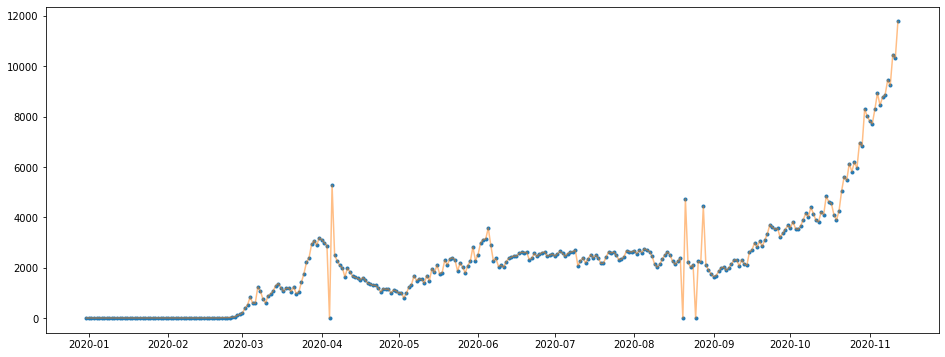

In [8]:
covid_iran = covid.loc[iran_data_select, :].sort_values(by='dateRep').set_index('dateRep') # .reset_index(drop=True)

plt.figure(figsize=(16, 6))
plt.plot(covid_iran['cases'], '.')
plt.plot(covid_iran['cases'], alpha=0.5)

## Check and remove outliers

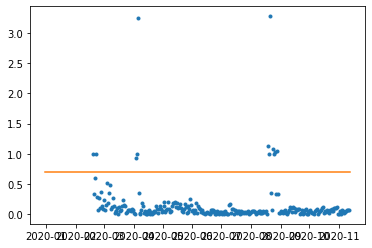

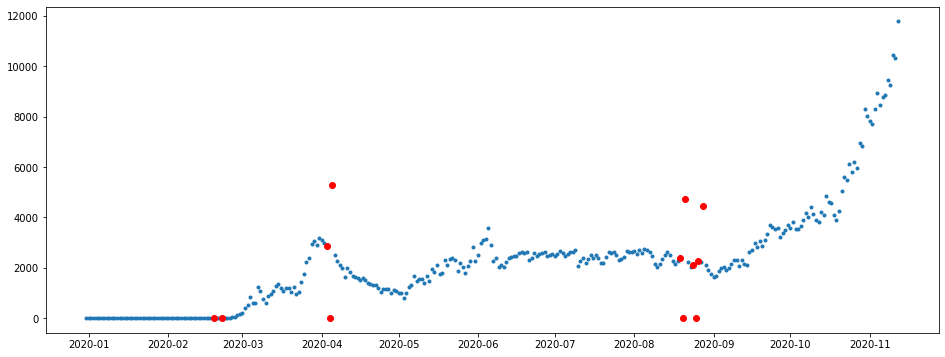

In [6]:
covid_iran['expected_cases'] = (covid_iran['cases'].shift(-1) + covid_iran['cases'].shift(1)) / 2 

is_outlier = np.abs((covid_iran['expected_cases'] - covid_iran['cases']) / covid_iran['expected_cases'])
plt.plot(is_outlier, '.') # --> threshold is 0.7
plt.plot(is_outlier.index, [0.7 for _ in is_outlier.index])


plt.figure(figsize=(16, 6))
plt.plot(covid_iran['cases'], '.')
plt.plot(covid_iran.loc[is_outlier > 0.7, 'cases'], 'or')

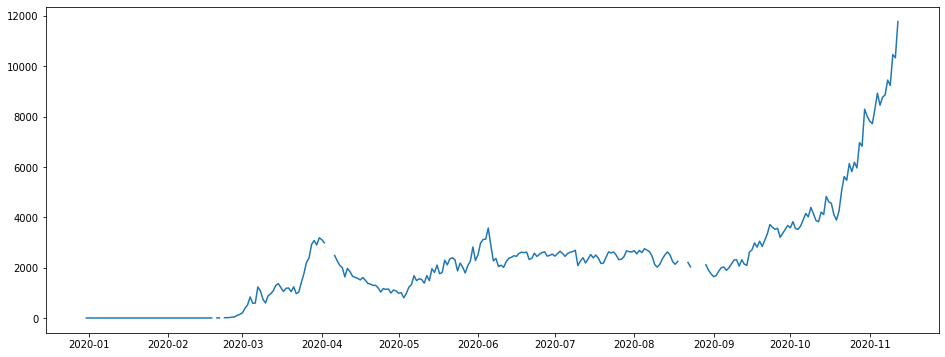

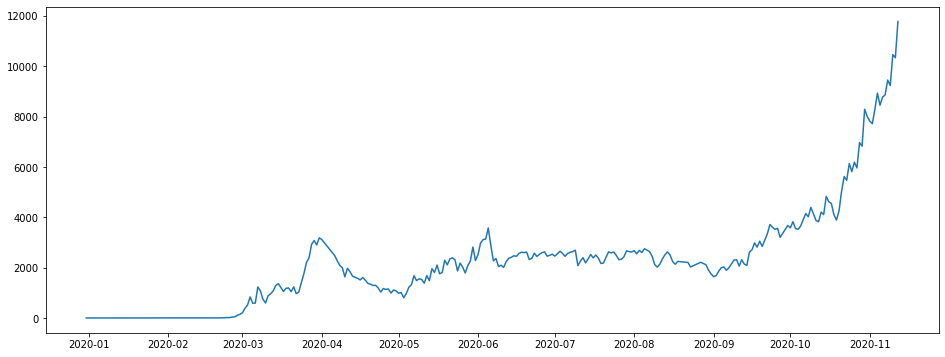

In [13]:
covid_iran.loc[is_outlier > 0.7, 'cases'] = np.nan

plt.figure(figsize=(16, 6))
plt.plot(covid_iran['cases'])

plt.figure(figsize=(16, 6))
covid_iran['cases'] = covid_iran['cases'].interpolate(method='linear')  # Fill removed outliers
plt.plot(covid_iran['cases'])